In [1]:
%load_ext autoreload
%autoreload 2

In [67]:
import sys
from pathlib import Path
from time import time
from copy import deepcopy
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT_PATH = Path().absolute().parent.parent
if str(ROOT_PATH) not in sys.path:
    sys.path.insert(1, str(ROOT_PATH))
from frequency_response import FrequencyResponse
from peq import PEQ, Peaking, HighShelf
from constants import DEFAULT_FS, PEQ_CONFIGS

In [29]:
def bw2q(bw):
    return np.sqrt(2 ** bw) / (2 ** bw - 1)

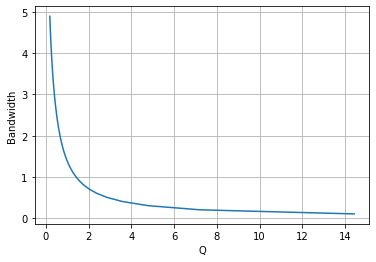

In [37]:
bw = np.arange(0.1, 5, 0.1)
q = bw2q(bw)
fig, ax = plt.subplots()
ax.plot(q, bw)
ax.grid()
ax.set_xlabel('Q')
ax.set_ylabel('Bandwidth')
plt.show()

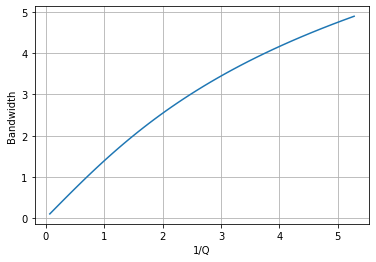

In [38]:
fig, ax = plt.subplots()
ax.plot(1/q, bw)
ax.grid()
ax.set_xlabel('1/Q')
ax.set_ylabel('Bandwidth')
plt.show()

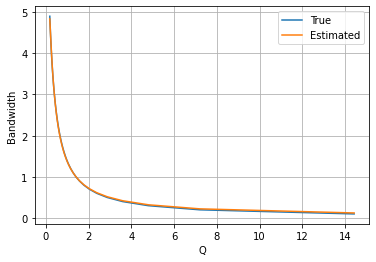

-0.7018*(1/Q)^2 + 2.3557*(1/Q) + 3.1807


In [47]:
p = np.polynomial.Polynomial.fit(1 / q, bw, 2)
p.convert()
fig, ax = plt.subplots()
ax.plot(q, bw, label='True')
ax.plot(q, p(1/q), label='Estimated')
ax.grid()
ax.set_xlabel('Q')
ax.set_ylabel('Bandwidth')
ax.legend()
plt.show()
print(f'{p.coef[2]:.4f}*(1/Q)^2 {"+" if p.coef[1] >= 0 else "-"} {p.coef[1]:.4f}*(1/Q) {"+" if p.coef[0] >= 0 else "-"} {np.abs(p.coef[0]):.4f}')

In [56]:
2 ** (p(1/0.707) / 2)

1.9163305646506728

In [61]:
p.coef

array([ 3.18073083,  2.35572351, -0.70175432])

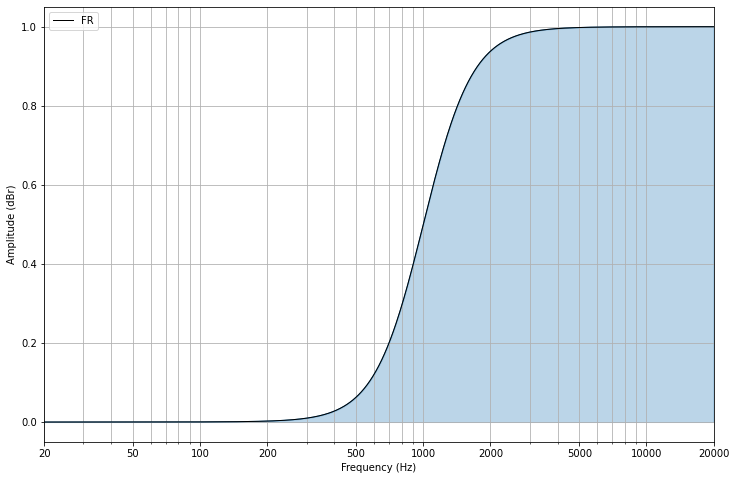

In [73]:
f = FrequencyResponse.generate_frequencies()
peq = PEQ(f, fs=DEFAULT_FS, filters=[HighShelf(f, DEFAULT_FS, fc=1000, q=0.7, gain=1)])
peq.plot()
plt.show()

In [74]:
peq.fr[np.argmin(np.abs(peq.f - 1000 * 2**(0.5)))]

0.7961453180082678

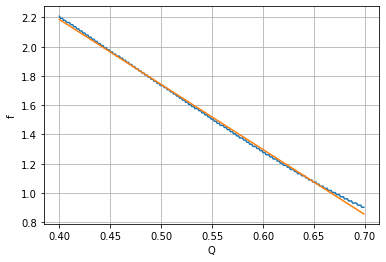

-0.6649*Q + 1.5214


In [107]:
qs = np.arange(0.4, 0.7, 0.001)
fcuts = []
for q in qs:
    peq = PEQ(f, fs=DEFAULT_FS, filters=[HighShelf(f, DEFAULT_FS, fc=1000, q=q, gain=1)])
    fcuts.append(np.log2(peq.f[np.argmin(np.abs(peq.fr - 0.92))] / 1000))
p = np.polynomial.Polynomial.fit(qs, fcuts, 1)
p.convert()
fig, ax = plt.subplots()
ax.plot(qs, fcuts, label='True')
ax.plot(qs, p(qs), label='Estimate')
ax.grid()
ax.set_xlabel('Q')
ax.set_ylabel('f')
plt.show()
print(f'{p.coef[1]:.4f}*Q {"+" if p.coef[0] >= 0 else "-"} {np.abs(p.coef[0]):.4f}')

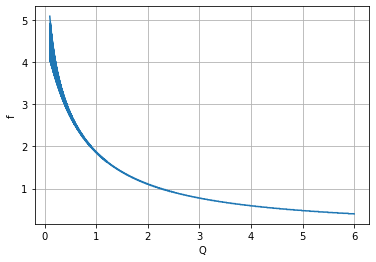

In [93]:
qs = np.arange(0.1, 6, 0.001)
fcuts = []
for q in qs:
    peq = PEQ(f, fs=DEFAULT_FS, filters=[Peaking(f, DEFAULT_FS, fc=1000, q=q, gain=1)])
    fcuts.append(np.abs(np.log2(peq.f[np.argmin(np.abs(peq.fr - 0.08))] / 1000)))
fig, ax = plt.subplots()
ax.plot(qs, fcuts)
ax.grid()
ax.set_xlabel('Q')
ax.set_ylabel('f')
plt.show()